### Show data

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('data/salaries.csv')

In [3]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  16494.000000  1.649400e+04   16494.000000  16494.000000
mean    2023.224991  1.637878e+05  149713.575725     32.044986
std        0.713405  3.406017e+05   68516.136918     46.260201
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.020000e+05  101517.500000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.873422e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000

In [4]:
df.head(10)

work_year experience_level employment_type                       job_title  \
0       2024               MI              FT                  Data Scientist   
1       2024               MI              FT                  Data Scientist   
2       2024               MI              CT                  Data Scientist   
3       2024               MI              CT                  Data Scientist   
4       2024               MI              FT            Data Science Manager   
5       2024               MI              FT            Data Science Manager   
6       2024               SE              FT  Business Intelligence Engineer   
7       2024               SE              FT  Business Intelligence Engineer   
8       2024               SE              FT                  Data Architect   
9       2024               SE              FT                  Data Architect   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  120000             USD         120000                 AU             0   
1   70000             USD          70000                 AU             0   
2  130000             USD         130000                 US             0   
3  110000             USD         110000                 US             0   
4  240000             USD         240000                 US             0   
5  180000             USD         180000                 US             0   
6  202800             USD         202800                 US             0   
7  115000             USD         115000                 US             0   
8   80000             GBP         100000                 GB             0   
9   45000             GBP          56250                 GB             0   

  company_location company_size  
0               AU            S  
1               AU            S  
2               US            M  
3               US            M  
4               US            M  
5               US            M  
6               US            M  
7               US            M  
8               GB            M  
9               GB            M

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Check and evaluate data

In [6]:
print("Mean Salary:", round(df["salary_in_usd"].mean()))
print("Median Salary:", round(df["salary_in_usd"].median()))
print("Highest Salary:", round(df["salary_in_usd"].max()))
print("Lowest Salary:", round(df["salary_in_usd"].min()))

Mean Salary: 149714
Median Salary: 141300
Highest Salary: 800000
Lowest Salary: 15000


In [7]:
df["salary_in_usd"].sort_values()[:5]

15896    15000
15599    15000
10760    15000
12971    15000
11021    15680
Name: salary_in_usd, dtype: int64

In [8]:
df["salary_in_usd"].sort_values(ascending = False)[:5]

2764    800000
3607    774000
7458    750000
7350    750000
4582    750000
Name: salary_in_usd, dtype: int64

In [9]:
df["job_title"].value_counts().head(10)

job_title
Data Engineer                3456
Data Scientist               3312
Data Analyst                 2428
Machine Learning Engineer    1703
Research Scientist            529
Data Architect                433
Applied Scientist             433
Analytics Engineer            431
Research Engineer             306
Data Science                  271
Name: count, dtype: int64

In [10]:
# desired_job_titles = [
#     'Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist',
#     'Data Architect', 'Applied Scientist', 'Analytics Engineer', 'Research Engineer', 'Data Science'
# ]
# filtered_df = df[df['job_title'].isin(desired_job_titles)]
# experience_mapping = {
#     'EN': 1,
#     'MI': 2,
#     'SE': 3,
#     'EX': 4
# }
# filtered_df['experience_level'] =filtered_df['experience_level'].map(experience_mapping)


NameError: name 'filtered_df' is not defined

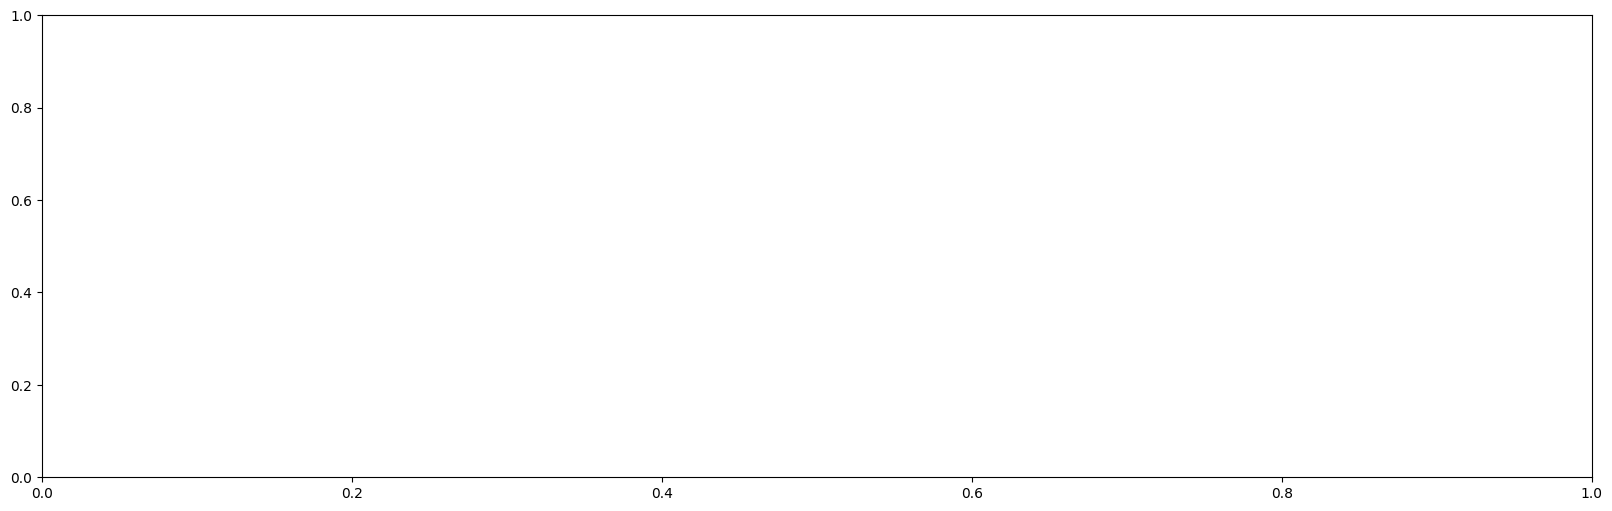

In [11]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = filtered_df["salary_in_usd"], y = filtered_df["job_title"], palette = "tab20");
plt.title('Mức Lương Theo 10 Lĩnh Vực AI hot nhất')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Mức Lương Theo cấp độ ')

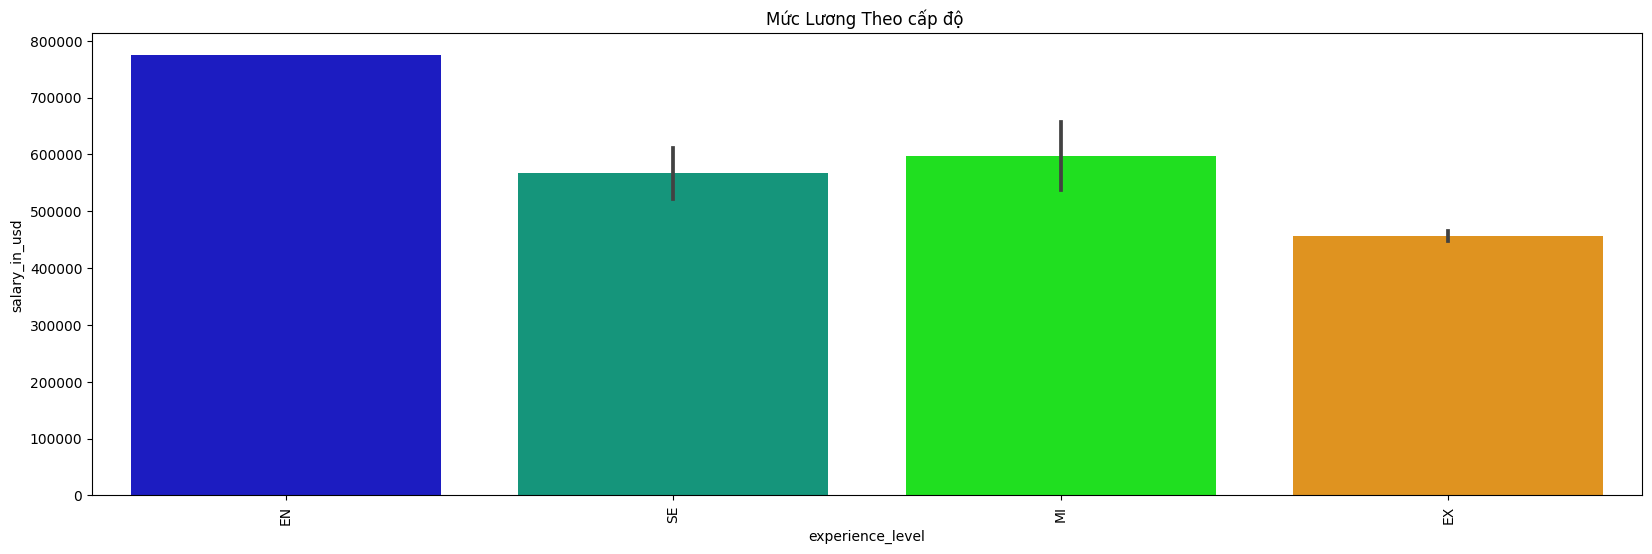

In [ ]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("salary_in_usd", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["experience_level"][1:51],
            y = df["salary_in_usd"][1:51],
            palette = "nipy_spectral");
plt.title('Mức Lương Theo cấp độ ')

In [ ]:
import nbformat
print(nbformat.__version__)

5.10.4


In [ ]:
import plotly.express as px
df_numeric = df.select_dtypes(include=[np.number])

In [ ]:
fig=px.imshow(df_numeric.corr(),text_auto=True,height=600,width=600,template='plotly',aspect='auto',title='<b>paiwise correlation of columns</b>')
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
z=df['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='ggplot2',title='<b> 10 vai trò hàng đầu trong AI')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'job title','y':'count','text':'count'},template='ggplot2')
fig.show()

In [ ]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},text='salary_in_usd',template='seaborn',title='<b> Top 10 vai trò được trả lương cao nhất trong Lĩnh vực AI')
fig.show()

In [ ]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in usd'},text='salary_in_usd',template='seaborn',title='<b> 10 vai trò hàng đầu trong lĩnh vực AI dựa trên mức lương trung bình')
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
fig=px.pie(df.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',title='<b>  Cấp độ kinh nghiệm về AI')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [ ]:
fig=px.pie(df.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='employment_type',values='salary_in_usd',color='employment_type',hole=0.7,labels={'employment_type':'Employment level','salary_in_usd':'count'},template='seaborn',title='<b>  Cấp độ nhân viên trong lĩnh vực AI')
fig.update_layout(title_x=0.5)

In [ ]:
px.histogram(df,x='salary_in_usd',marginal='rug',template='ggplot2',labels={'salary_in_usd':'Salary in USD'},title='<b> Phân phối lương')

In [ ]:
px.violin(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},template='seaborn',title='<b>Mức lương AI theo năm')

In [ ]:
px.box(df,x='experience_level',y='salary_in_usd',color='experience_level',template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Mức lương AI theo kinh nghiệm')

In [ ]:
px.box(df,x='employment_type',y='salary_in_usd',color='employment_type',template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},title='<b> Mức lương AI theo loại nhân viên')

In [ ]:
px.box(df,x='company_size',y='salary_in_usd',color='company_size',template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},title='<b>Mức lương AI theo quy mô công ty')

In [ ]:
company_location_counts = df["company_location"].value_counts()

# Sắp xếp value_counts() theo giá trị (số lần xuất hiện) theo thứ tự giảm dần
company_location_counts = company_location_counts.sort_values(ascending=False)

# Lấy 15 company_location có value_counts() lớn nhất
top_15_company_locations = company_location_counts.head(15)

# Truy xuất dữ liệu từ DataFrame
top_15_data = df[df["company_location"].isin(top_15_company_locations.index)]


In [ ]:
px.violin(top_15_data,x='company_location',y='salary_in_usd',color='company_location',labels={'company_location':'location','salary_in_usd':'salary in usd'},template='seaborn',title='<b>Mức lương AI theo 15 nước có nhiều việc làm AI')

In [ ]:
px.bar(df.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15),x='company_location',y='experience_level',color_discrete_sequence=['magenta'],labels={'experience_level':'count'},template='plotly_dark',title='<b> Top 15 quốc gia có số việc làm AI cao nhất')

In [ ]:
fig=px.treemap(df,path=[px.Constant('Job Roles'),'job_title','company_location','experience_level'],hover_name='job_title',template='ggplot2',title='<b>Sơ đồ dạng cây về các vai trò khác nhau trong AI với Cấp độ Kinh nghiệm')
fig.update_traces(root_color='lightgrey')

### Data show

In [12]:
df = df.drop(['employee_residence','salary_currency','salary'],axis='columns')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         16494 non-null  int64 
 1   experience_level  16494 non-null  object
 2   employment_type   16494 non-null  object
 3   job_title         16494 non-null  object
 4   salary_in_usd     16494 non-null  int64 
 5   remote_ratio      16494 non-null  int64 
 6   company_location  16494 non-null  object
 7   company_size      16494 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [ ]:
df['experience_level'].value_counts()

experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

In [ ]:
df['employment_type'].value_counts()

employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [ ]:
df['job_title'].value_counts()

job_title
Data Engineer                      3456
Data Scientist                     3312
Data Analyst                       2428
Machine Learning Engineer          1703
Research Scientist                  529
                                   ... 
Marketing Data Scientist              1
Cloud Data Architect                  1
Staff Machine Learning Engineer       1
Big Data Developer                    1
Principal Data Architect              1
Name: count, Length: 155, dtype: int64

In [ ]:
df['company_location'].value_counts()

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
IR        1
CN        1
MU        1
QA        1
EC        1
Name: count, Length: 77, dtype: int64

### Create train data

In [13]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
df['salary_in_usd'] = df['salary_in_usd'] /1000

In [15]:
experience_mapping = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
experience_mapping2 = {
    'S': 1,
    'M': 2,
    'L': 3
}
experience_mapping3 = {
    'FT': 1,
    'PT': 2,
    'CT': 3,
    'FL': 4
}
df['experience_level'] =df['experience_level'].map(experience_mapping)
df['company_size'] =df['company_size'].map(experience_mapping2)
df['employment_type'] =df['employment_type'].map(experience_mapping3)

In [16]:
X = df[['work_year', 'experience_level', 'employment_type', 'job_title','remote_ratio', 'company_location',
       'company_size']]
Y = df['salary_in_usd']

In [ ]:
X

work_year  experience_level  employment_type                 job_title  \
0           2024                 2                1            Data Scientist   
1           2024                 2                1            Data Scientist   
2           2024                 2                3            Data Scientist   
3           2024                 2                3            Data Scientist   
4           2024                 2                1      Data Science Manager   
...          ...               ...              ...                       ...   
16489       2020                 3                1            Data Scientist   
16490       2021                 2                1  Principal Data Scientist   
16491       2020                 1                1            Data Scientist   
16492       2020                 1                3     Business Data Analyst   
16493       2021                 3                1      Data Science Manager   

       remote_ratio company_location  company_size  
0                 0               AU             1  
1                 0               AU             1  
2                 0               US             2  
3                 0               US             2  
4                 0               US             2  
...             ...              ...           ...  
16489           100               US             3  
16490           100               US             3  
16491           100               US             1  
16492           100               US             3  
16493            50               IN             3  

[16494 rows x 7 columns]

### Encode categorical data

In [17]:
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore

In [18]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform_1 = ohe.fit_transform(X[['job_title']])
ohetransform_1

job_title_AI Architect  job_title_AI Developer  job_title_AI Engineer  \
0                         0.0                     0.0                    0.0   
1                         0.0                     0.0                    0.0   
2                         0.0                     0.0                    0.0   
3                         0.0                     0.0                    0.0   
4                         0.0                     0.0                    0.0   
...                       ...                     ...                    ...   
16489                     0.0                     0.0                    0.0   
16490                     0.0                     0.0                    0.0   
16491                     0.0                     0.0                    0.0   
16492                     0.0                     0.0                    0.0   
16493                     0.0                     0.0                    0.0   

       job_title_AI Product Manager  job_title_AI Programmer  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   
...                             ...                      ...   
16489                           0.0                      0.0   
16490                           0.0                      0.0   
16491                           0.0                      0.0   
16492                           0.0                      0.0   
16493                           0.0                      0.0   

       job_title_AI Research Engineer  job_title_AI Research Scientist  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
...                               ...                              ...   
16489                             0.0                              0.0   
16490                             0.0                              0.0   
16491                             0.0                              0.0   
16492                             0.0                              0.0   
16493                             0.0                              0.0   

       job_title_AI Scientist  job_title_AI Software Engineer  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   
...                       ...                             ...   
16489                     0.0                             0.0   
16490                     0.0                             0.0   
16491                     0.0                             0.0   
16492                     0.0                             0.0   
16493                     0.0                             0.0   

       job_title_AWS Data Architect  ...  job_title_Research Analyst  \
0                               0.0  ...                         0.0   
1                               0.0  ...                         0.0   
2                               0.0  ...                         0.0   
3                               0.0  ...                         0.0   
4                               0.0  ...                         0.0   
...                             ...  ...                         ...   
16489                           0.0  ...                         0.0   
16490                          

In [19]:
ohetransform_2 = ohe.fit_transform(X[['company_location']])
ohetransform_2

company_location_AD  company_location_AE  company_location_AM  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
16489                  0.0                  0.0                  0.0   
16490                  0.0                  0.0                  0.0   
16491                  0.0                  0.0                  0.0   
16492                  0.0                  0.0                  0.0   
16493                  0.0                  0.0                  0.0   

       company_location_AR  company_location_AS  company_location_AT  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
16489                  0.0                  0.0                  0.0   
16490                  0.0                  0.0                  0.0   
16491                  0.0                  0.0                  0.0   
16492                  0.0                  0.0                  0.0   
16493                  0.0                  0.0                  0.0   

       company_location_AU  company_location_BA  company_location_BE  \
0                      1.0                  0.0                  0.0   
1                      1.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
16489                  0.0                  0.0                  0.0   
16490                  0.0                  0.0                  0.0   
16491                  0.0                  0.0                  0.0   
16492                  0.0                  0.0                  0.0   
16493                  0.0                  0.0                  0.0   

       company_location_BR  ...  company_location_SA  company_location_SE  \
0                      0.0  ...                  0.0                  0.0   
1                      0.0  ...                  0.0                  0.0   
2                      0.0  ...                  0.0                  0.0   
3                      0.0  ...                  0.0                  0.0   
4                      0.0  ...                  0.0                  0.0   
...                    ...  ...                  ...                  ...   
16489                  0.0  ...                  0.0                  0.0   
16490                  0.0  ...                  0.0                  0.0   
16491                  0.0  ...                  0.0                  0.0   
16492                  0.0  ...                  0.0                  0.0   
16493                  0.0  ...                  0.0                  0.0   

       company_location_SG  company_location_SI  company_location_TH  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...        

In [20]:
transformed_X = pd.concat([X['work_year'],X['experience_level'],X['employment_type'],ohetransform_1,X['remote_ratio'],ohetransform_2,X['company_size']],axis=1)
transformed_X

work_year  experience_level  employment_type  job_title_AI Architect  \
0           2024                 2                1                     0.0   
1           2024                 2                1                     0.0   
2           2024                 2                3                     0.0   
3           2024                 2                3                     0.0   
4           2024                 2                1                     0.0   
...          ...               ...              ...                     ...   
16489       2020                 3                1                     0.0   
16490       2021                 2                1                     0.0   
16491       2020                 1                1                     0.0   
16492       2020                 1                3                     0.0   
16493       2021                 3                1                     0.0   

       job_title_AI Developer  job_title_AI Engineer  \
0                         0.0                    0.0   
1                         0.0                    0.0   
2                         0.0                    0.0   
3                         0.0                    0.0   
4                         0.0                    0.0   
...                       ...                    ...   
16489                     0.0                    0.0   
16490                     0.0                    0.0   
16491                     0.0                    0.0   
16492                     0.0                    0.0   
16493                     0.0                    0.0   

       job_title_AI Product Manager  job_title_AI Programmer  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   
...                             ...                      ...   
16489                           0.0                      0.0   
16490                           0.0                      0.0   
16491                           0.0                      0.0   
16492                           0.0                      0.0   
16493                           0.0                      0.0   

       job_title_AI Research Engineer  job_title_AI Research Scientist  ...  \
0                                 0.0                              0.0  ...   
1                                 0.0                              0.0  ...   
2                                 0.0                              0.0  ...   
3                                 0.0                              0.0  ...   
4                                 0.0                              0.0  ...   
...                               ...                              ...  ...   
16489                             0.0                              0.0  ...   
16490                             0.0                              0.0  ...   
16491                             0.0                              0.0  ...   
16492                             0.0                              0.0  ...   
16493                             0.0                              0.0  ...   

       company_location_SE  company_location_SG  company_location_SI  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
16489                  0.0                  0.0                  0.0   
16490                  0.0                  0.0                  0.0   
16491              

### Splitting the dataset

In [21]:

from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(transformed_X, Y, test_size= 0.2, random_state= 100)

### Training model

In [22]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.ensemble import VotingRegressor # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore
from sklearn.ensemble import GradientBoostingRegressor # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore

model = DecisionTreeRegressor(min_samples_split=3, max_depth=3)

In [ ]:
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([160.21192608, 160.21192608, 160.21192608, ..., 112.02280012,
       160.21192608, 112.02280012])

### Evaluate model

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score # type: ignore

In [ ]:
# hiệu suất của mô hình
model_s = model.score(X_train,y_train)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('hiệu suất của mô hình : ', model_s)
print('sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế  : ', mse)
print('sai số trung bình tuyệt đối: ', mae)
print('Root Mean Squared Error: ', rmse)

hiệu suất của mô hình :  0.19127668960625455
sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế  :  3891.421892111059
sai số trung bình tuyệt đối:  45.656553860031956
Root Mean Squared Error:  62.381262347848164


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


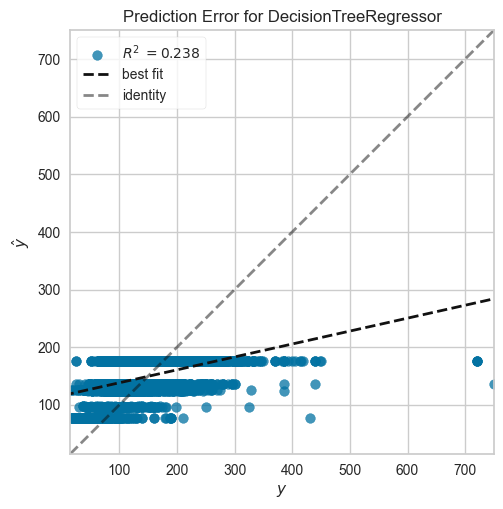

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


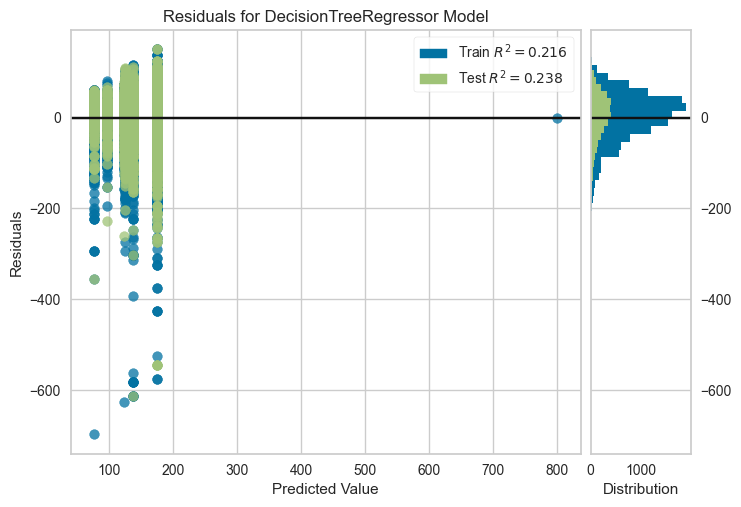

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

### Advanced models

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
# Thiết lập các giá trị siêu tham số cần thử nghiệm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Khởi tạo mô hình RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)


In [26]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  28.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  28.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  29.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  27.8s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Lấy ra các siêu tham số tốt nhất
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Dự đoán trên tập kiểm tra với mô hình tốt nhất
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Tính toán MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Best parameters found: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 3178.1632197439617


In [30]:
model_s1 = best_rf.score(X_train,y_train)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('hiệu suất của mô hình : ', model_s1)
print('sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế  : ', mse)
print('sai số trung bình tuyệt đối: ', mae)
print('Root Mean Squared Error: ', rmse)

hiệu suất của mô hình :  0.3840361547638813
sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế  :  3178.1632197439617
sai số trung bình tuyệt đối:  40.611674187541574
Root Mean Squared Error:  56.37520039648606
